In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:


covid_data = pd.read_csv("covid.csv")
covid_data.head()


c:\users\sanidhiya\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


## Data Cleaning

In [4]:
for elem in covid_data.columns:
    print(elem)

columns_not_required = [
'test_date',
'test_indication',
'age_60_and_above',
]


for elem in columns_not_required:
    covid_data = covid_data.drop(elem,axis = 1)

# Remove Rows with None
covid_data = covid_data.replace(to_replace='None')

test_date
cough
fever
sore_throat
shortness_of_breath
head_ache
corona_result
age_60_and_above
gender
test_indication


## Exploratory Data Analysis

Positive Cases 14729
Negative Negatives 260227
Others 3892


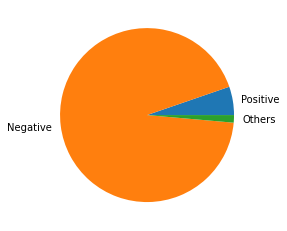

In [6]:
test_results = [elem for elem in covid_data['corona_result']]
positives = test_results.count('positive')
negatives = test_results.count('negative')
others = test_results.count('other')

print("Positive Cases", positives)
print("Negative Negatives",negatives)
print("Others",others)
y = np.array([positives,negatives,others])
labels = ["Positive","Negative","Others"]

plt.pie(y,labels=labels)
plt.show()

Covid Positive Cases Symptoms
Cough 12525
Fever 12046
Sore Throat 2591
Shortness of Breath 2221
Headache 3212


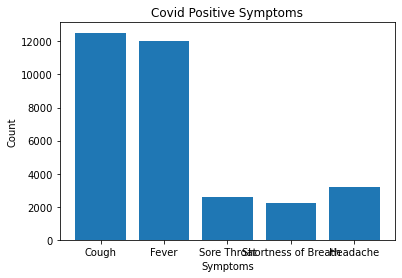

In [7]:
cough,fever,sore_throat,shortness_of_breath,head_ache = (0,0,0,0,0)

for index,elem in covid_data.iterrows():
    if elem['corona_result'] == 'positive':
        if elem['cough']:
            cough += 1
        if elem['fever']:
            fever += 1
        if elem['sore_throat']:
            sore_throat += 1
        if elem['shortness_of_breath']:
            shortness_of_breath += 1
        if elem['head_ache']:
            head_ache +=1

print("Covid Positive Cases Symptoms")
print("Cough",cough)
print("Fever",fever)
print("Sore Throat",sore_throat)
print("Shortness of Breath",shortness_of_breath)
print("Headache",head_ache)

y = np.array([cough,fever,sore_throat,shortness_of_breath,head_ache])
x =  ["Cough","Fever","Sore Throat","Shortness of Breath","Headache"]
plt.bar(x,y)
plt.xlabel("Symptoms")
plt.ylabel("Count")
plt.title("Covid Positive Symptoms")
plt.show()

## Machine Learning (KNN Classifier)

In [8]:
encoder = LabelEncoder()
covid_data['corona_result'] = encoder.fit_transform(covid_data['corona_result'])
covid_data['gender'] = encoder.fit_transform(covid_data['gender'])

X = covid_data.drop('corona_result',axis = 1)
y = covid_data['corona_result']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9446006426440211
